In [112]:
pip install google-play-scraper

In [113]:
from google_play_scraper import Sort, reviews
from google_play_scraper import app
import pandas as pd
import numpy as np

In [114]:
result, continuation_token = reviews('com.whatsapp',
                                     lang='id', #bahasa
                                     country= 'id', #negara
                                     sort=Sort.MOST_RELEVANT, #sorting yang paling relevan
                                     count=10000, #jumlah dataset yang ingin kita ambil
                                     filter_score_with= None #isi dengan 1, 2, 3, 4, 5 None jika ingin bercampur
                                     )

In [115]:
data = pd.DataFrame(result)
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,f77c0bf1-1e8d-42b9-9da2-6562e36bb562,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"not bad, but not good. lag, pesan selalu delay...",4,4109,2.25.33.79,2025-11-14 10:38:47,None,None,2.25.33.79
1,897a6505-f9f9-40a8-84ac-3df89831a2c3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi nya BERGUNA cuma ada kekurangan! 1 Ad...,3,113,2.25.34.74,2025-11-24 13:16:08,None,None,2.25.34.74
2,f07e7b26-80ba-4948-8e03-ba88bf2c3224,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Banyak bug, error, suka kluar sendiri, lagi te...",1,3606,2.25.34.74,2025-11-22 04:32:41,None,None,2.25.34.74
3,dbf734eb-ced8-4c6a-9d02-6937ed5f0003,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"lebih baik info/tentang kaya waktu dulu2,kalau...",2,172,2.25.34.74,2025-11-23 09:22:39,None,None,2.25.34.74
4,8178e9e5-d1fd-4f12-aba6-f06cbcaba867,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"whatsapp sekarang sudah bagus, tetapi terkadan...",5,16299,2.25.32.75,2025-11-08 14:01:54,None,None,2.25.32.75


In [116]:
len(data) #cek panjang data

10000

In [117]:
data = data[['content', 'score']] #Menampilkan kolom conten dan score (data kolom yang akan diambil)
data.head()

,content,score
0,"not bad, but not good. lag, pesan selalu delay...",4
1,Aplikasi nya BERGUNA cuma ada kekurangan! 1 Ad...,3
2,"Banyak bug, error, suka kluar sendiri, lagi te...",1
3,"lebih baik info/tentang kaya waktu dulu2,kalau...",2
4,"whatsapp sekarang sudah bagus, tetapi terkadan...",5


In [118]:
data = data.rename(columns={'content' : 'ulasan', 'score':'penilaian'}) #mengganti nama kolom
data.head()

,ulasan,penilaian
0,"not bad, but not good. lag, pesan selalu delay...",4
1,Aplikasi nya BERGUNA cuma ada kekurangan! 1 Ad...,3
2,"Banyak bug, error, suka kluar sendiri, lagi te...",1
3,"lebih baik info/tentang kaya waktu dulu2,kalau...",2
4,"whatsapp sekarang sudah bagus, tetapi terkadan...",5


In [119]:
data.to_csv("whatsapp_reviews_gplay.csv", index=False, encoding='utf-8')

In [120]:
datawhatsapp = pd.read_csv('whatsapp_reviews_gplay.csv')
datawhatsapp.head()

,ulasan,penilaian
0,"not bad, but not good. lag, pesan selalu delay...",4
1,Aplikasi nya BERGUNA cuma ada kekurangan! 1 Ad...,3
2,"Banyak bug, error, suka kluar sendiri, lagi te...",1
3,"lebih baik info/tentang kaya waktu dulu2,kalau...",2
4,"whatsapp sekarang sudah bagus, tetapi terkadan...",5


In [121]:
import matplotlib.pyplot as plt
import seaborn as sns #visualisasi
import nltk #natural language untuk memahami ulasan
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud #menampilkan kata kata yang sering muncul

In [122]:
#DATA CLEANING

datawhatsapp = datawhatsapp.dropna() #menghilangkan nilai NUll
datawhatsapp['clean_text'] = datawhatsapp['ulasan'].str.replace('[^\w\s]','') #menghilangkan tanda baca
datawhatsapp['clean_text'] = datawhatsapp['clean_text'].str.lower() #menyamakan format penulisan

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
datawhatsapp['clean_text'] = datawhatsapp['clean_text'].apply(lambda x: " ".join([word for word in x.split() if word not in (stop_words)]))

<>:4: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-1420100971.py:4: SyntaxWarning: invalid escape sequence '\w'
  datawhatsapp['clean_text'] = datawhatsapp['ulasan'].str.replace('[^\w\s]','') #menghilangkan tanda baca
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


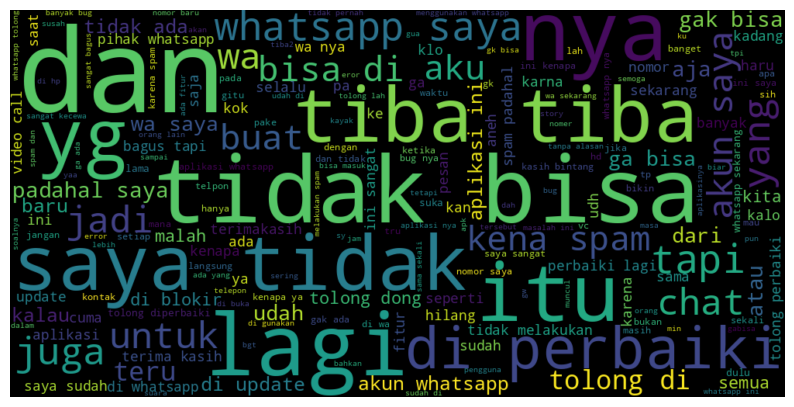

In [123]:
all_text = ' '.join(datawhatsapp['clean_text']) #gabung semua ulasan menjadi satu teks
wordcloud = WordCloud(width=1000, height=500, max_font_size=150, random_state=42).generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [124]:
stop_word = set(stopwords.words('indonesian'))
stop_words.update(['saya', 'jadi', 'ada', 'apa', 'karna', 'ya', 'kalau', 'kalo', 'ini', 'udah', 'ke', 'untuk', 'yang', 'juga', 'di', 'aku', 'tp', 'atau', 'aja', 'itu', 'lagi', 'dan', 'nya', 'tiba tiba', 'tapi', 'buat', 'yg', 'tiba' 'di', 'gak', 'ga', 'wa', 'hd', 'lah', 'dari', 'kan', 'kita', '']) #kata sambung yag tidak perlu

In [125]:
datawhatsapp['clean_text'] = datawhatsapp['ulasan'].str.replace('[^\w\s]','') #menghilangkan tanda baca
datawhatsapp['clean_text'] = datawhatsapp['clean_text'].str.lower() #menyamakan format penulisan
datawhatsapp['clean_text'] = datawhatsapp['clean_text'].apply(lambda x: " ".join([word for word in x.split() if word not in (stop_words)]))

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-370939509.py:1: SyntaxWarning: invalid escape sequence '\w'
  datawhatsapp['clean_text'] = datawhatsapp['ulasan'].str.replace('[^\w\s]','') #menghilangkan tanda baca


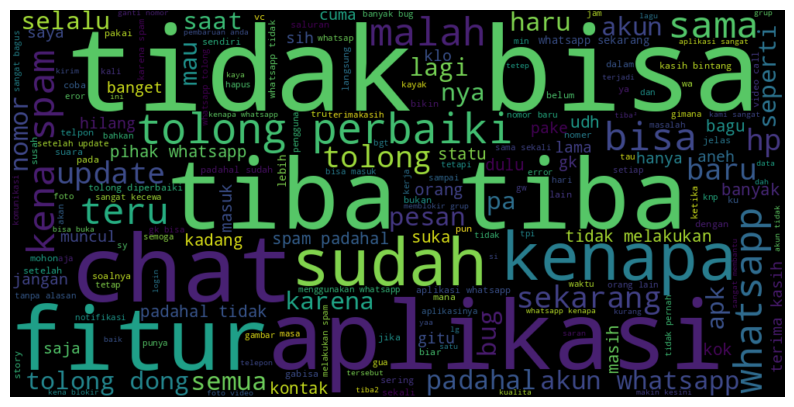

In [126]:
all_text = ' '.join(datawhatsapp['clean_text']) #gabung semua ulasan menjadi satu teks
wordcloud = WordCloud(width=1000, height=500, max_font_size=150, random_state=42).generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [127]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [128]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

datawhatsapp['sentiment'] = datawhatsapp['clean_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

datawhatsapp['sentiment_label'] = datawhatsapp['sentiment'].apply(lambda x: 'positif' if x > 0 else ('negatif' if x < 0 else 'netral'))

In [129]:
#menampilkan beberapa ulasan dan sentimen terkait
datawhatsapp[['ulasan', 'sentiment_label']].head(10)

,ulasan,sentiment_label
0,"not bad, but not good. lag, pesan selalu delay...",negatif
1,Aplikasi nya BERGUNA cuma ada kekurangan! 1 Ad...,negatif
2,"Banyak bug, error, suka kluar sendiri, lagi te...",negatif
3,"lebih baik info/tentang kaya waktu dulu2,kalau...",netral
4,"whatsapp sekarang sudah bagus, tetapi terkadan...",positif
5,Akhir akhir ini malah jadi males pake Whatsapp...,negatif
6,Kalo buka voice note layar suka mati ga bisa d...,netral
7,saya pake samsung kalo upload status itu hasil...,netral
8,gak konsisten di bagian waktu dalam story What...,netral
9,kenapa wa saya ngga bisa di update? padahal su...,netral


In [130]:
datawhatsapp.to_csv("hasil ulasan whatsapp.csv", index = False, encoding='utf-8')